In [17]:
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from src.dataset import CIFAR10Noisy
from matplotlib.colors import LogNorm
    
transform = ToTensor()

ds = CIFAR10Noisy(root='data', noise_type='gaussian', noise_rate=0.1,
                    train=True, download=True, transform=transform)

Files already downloaded and verified


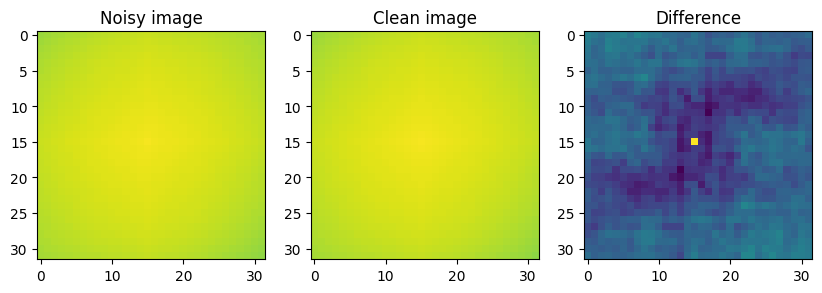

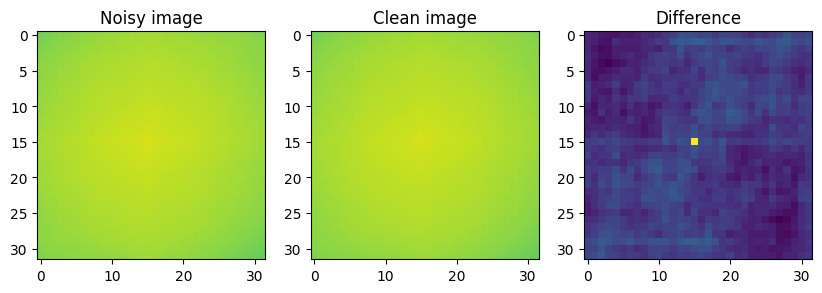

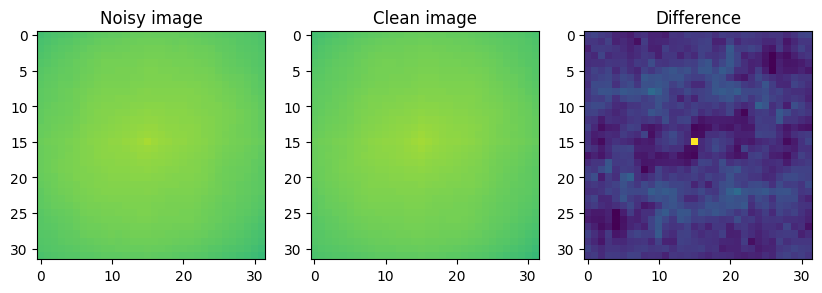

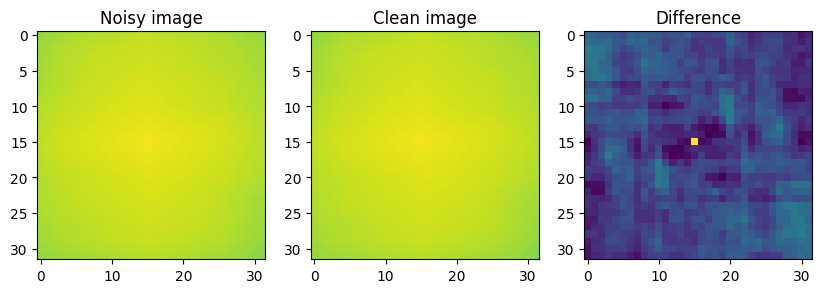

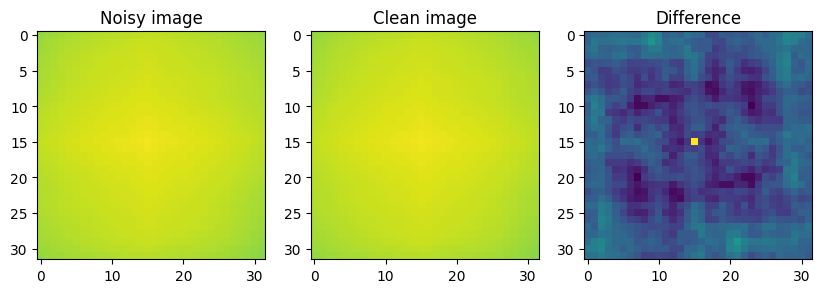

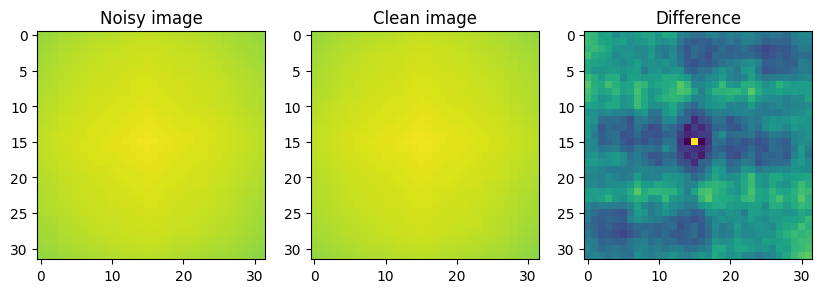

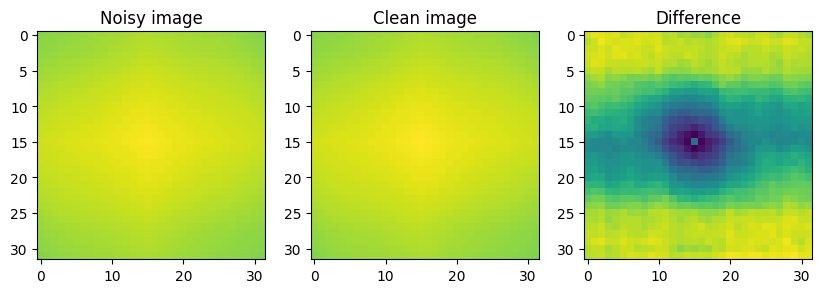

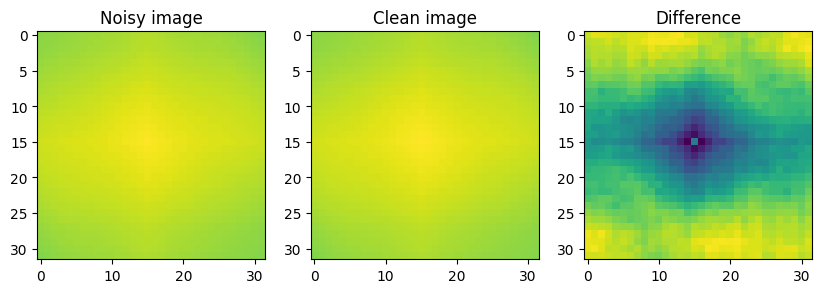

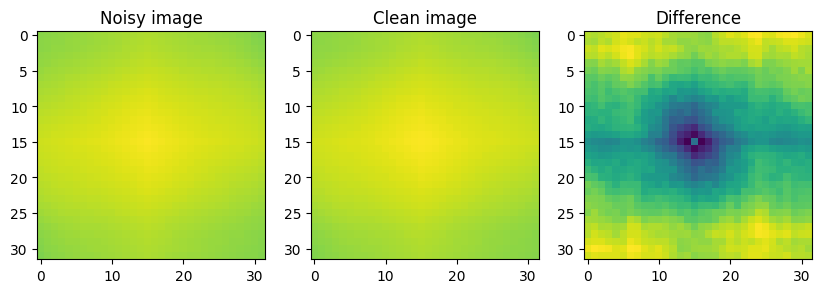

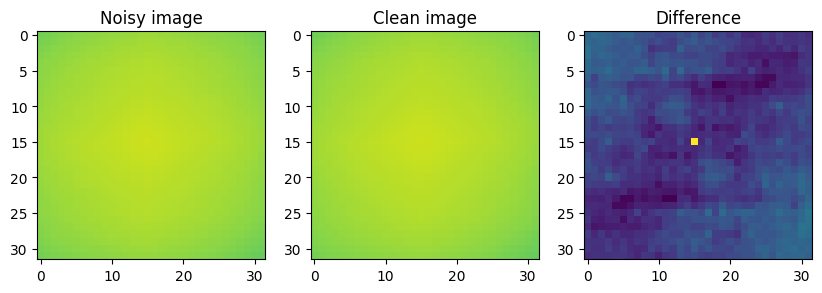

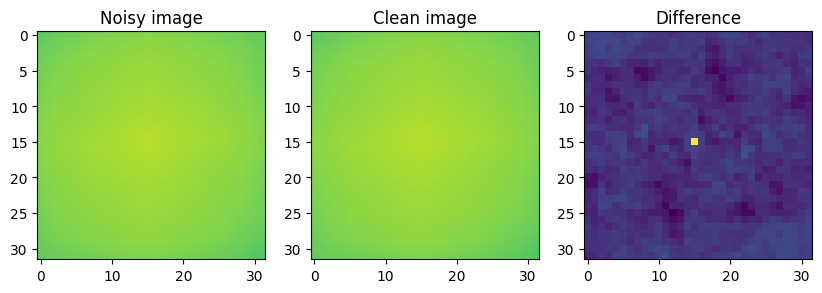

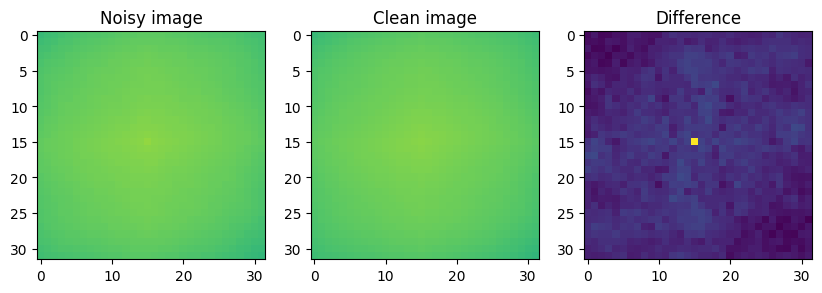

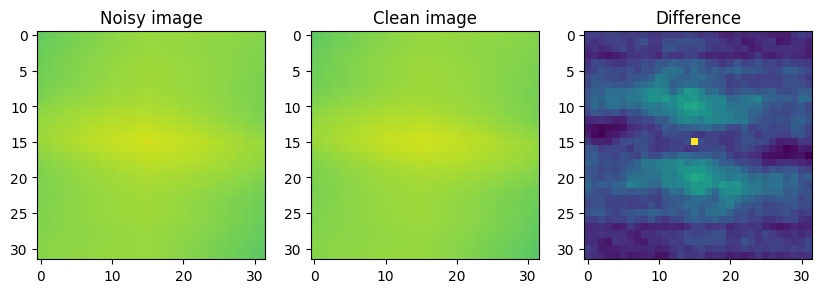

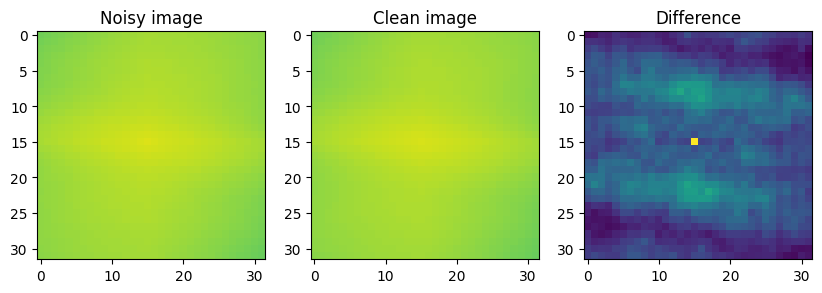

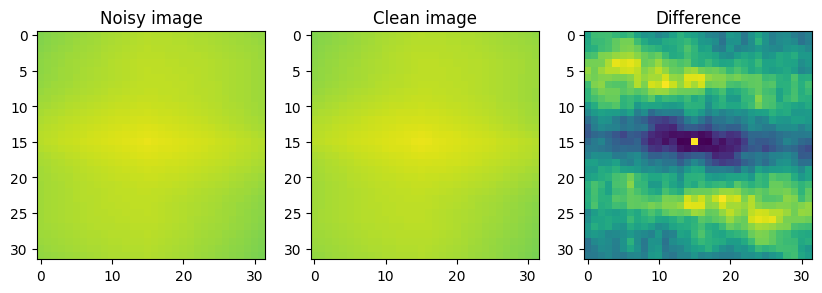

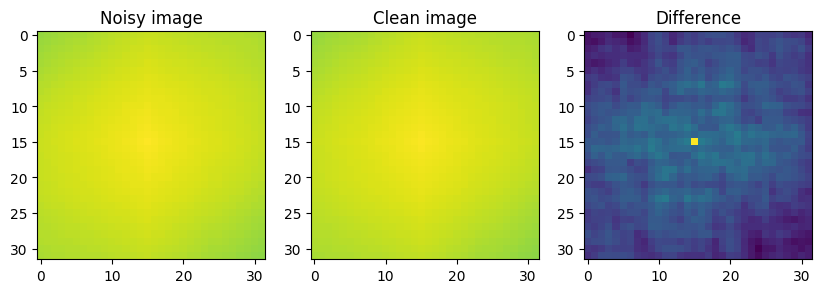

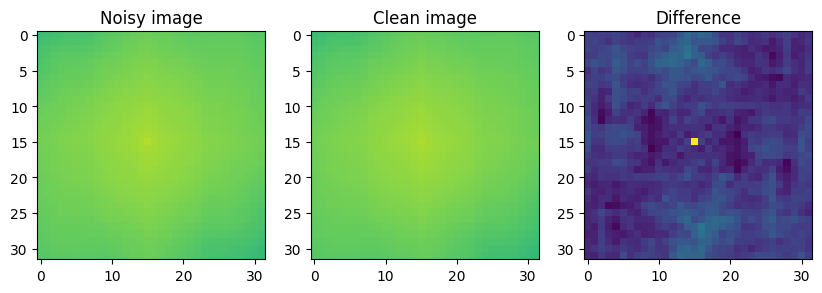

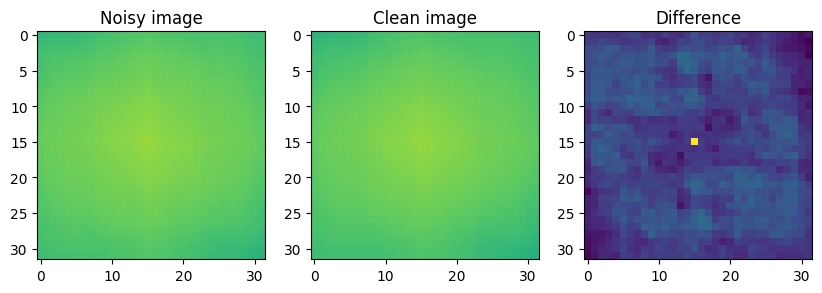

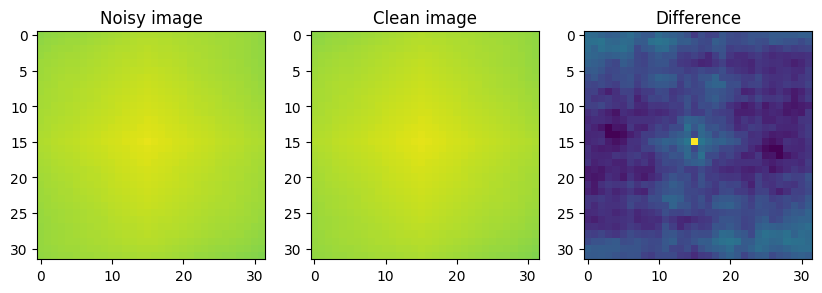

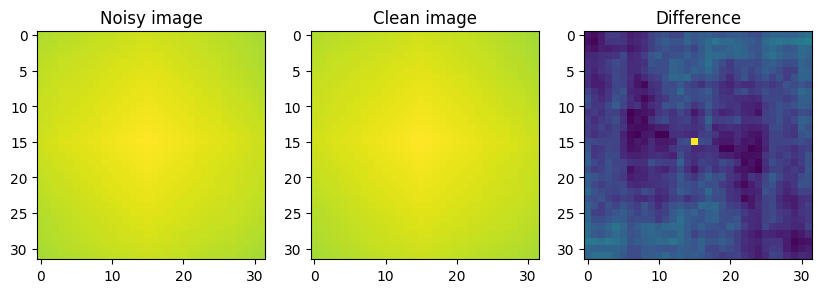

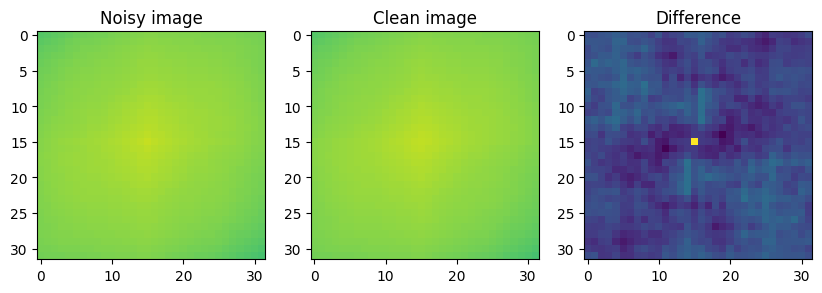

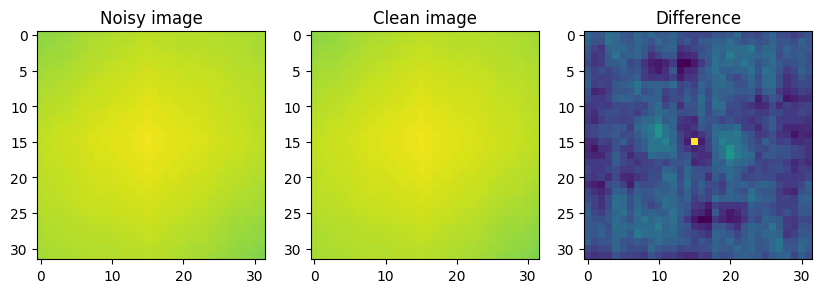

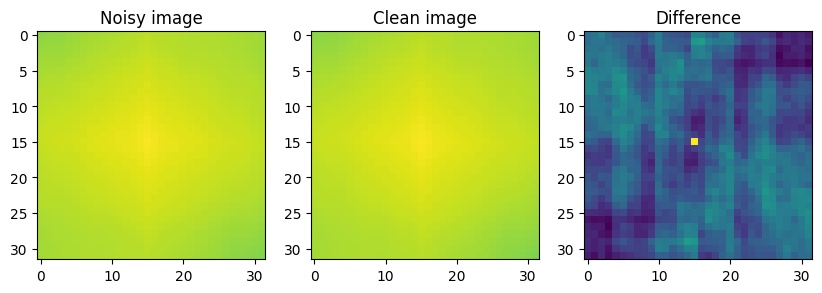

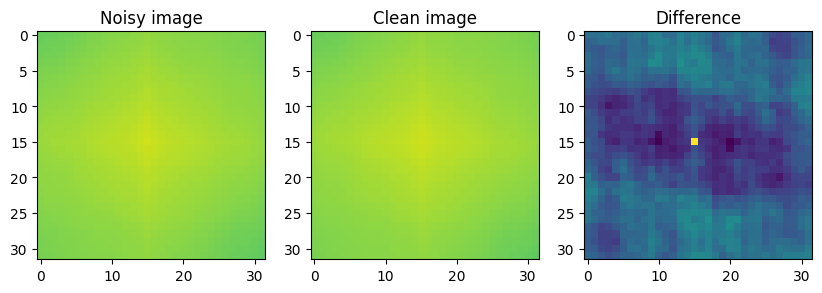

In [23]:
for i in range(8):
    noisy_img, img = ds[i]
    
    noisy_img = noisy_img.permute(1, 2, 0)
    img = img.permute(1, 2, 0)
    
    for ch in range(3):
        noisy_ch = noisy_img[..., ch]
        img_ch = img[..., ch]
        
        noisy_ac = correlate2d(noisy_ch.numpy(), noisy_ch.numpy(), mode='same')
        clean_ac = correlate2d(img_ch.numpy(), img_ch.numpy(), mode='same')
        
        diff = noisy_ac - clean_ac
        
        plt.figure(figsize=(10, 5))
        plt.subplot(131)
        plt.imshow(noisy_ac, norm=LogNorm(vmin=0.01, vmax=400))
        plt.title('Noisy image')
        plt.subplot(132)
        plt.imshow(clean_ac, norm=LogNorm(vmin=0.01, vmax=400))
        plt.title('Clean image')
        plt.subplot(133)
        plt.imshow(diff)
        plt.title('Difference')
        
        plt.show()
        